<a href="https://colab.research.google.com/github/bharathkreddy/brks_agents/blob/main/Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
print("hello worlds")

hello worlds


In [5]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print("not connected to a GPU")
else:
  print(gpu_info)

Mon Jul 21 18:38:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
from google.colab import userdata
HUGGINGFACE_API_KEY = userdata.get('HUGGINGFACE_API_KEY')

In [7]:
!pip install -q transformers datasets diffusers

In [8]:
# imports

import torch
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

In [6]:
# Sentiment Analysis

classifier = pipeline("sentiment-analysis")
result = classifier("I'm super knackered after coding entire day.")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cuda:0


[{'label': 'NEGATIVE', 'score': 0.9967589974403381}]


In [ ]:
classifier = pipeline("sentiment-analysis", model="Qwen/Qwen3-0.6B",key=HUGGINGFACE_API_KEY)
result = classifier("I'm super knackered after coding entire day.")
print(result)

config.json:   0%|          | 0.00/726 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.50G [00:00<?, ?B/s]

In [7]:
# Named Entity Recognition

ner = pipeline("ner", grouped_entities=True, device="cuda")
result = ner("Bharath Reddy is the lead AI engineer at Finbourne.")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'entity_group': 'PER', 'score': np.float32(0.9975752), 'word': 'Bharath Reddy', 'start': 0, 'end': 13}, {'entity_group': 'ORG', 'score': np.float32(0.784923), 'word': 'AI', 'start': 26, 'end': 28}, {'entity_group': 'ORG', 'score': np.float32(0.9821072), 'word': 'Finbourne', 'start': 41, 'end': 50}]


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:181: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [12]:
# Q&A

question_answerer = pipeline("question-answering", device=0)  # use device=0 for CUDA (GPU)
result = question_answerer({
    "question": "Who got elected as chief minister of Gujarat in 2001?",
    "context": "Narendra Damodardas Modi is an Indian politician who has served as the prime minister of India since 2014. Modi was the chief minister of Gujarat from 2001 to 2014 and is the member of parliament for Varanasi.."
})

print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


{'score': 0.8625938296318054, 'start': 0, 'end': 24, 'answer': 'Narendra Damodardas Modi'}


In [14]:
# summarizer

summarizer = pipeline("summarization", device=0)
text = """Qwen3 is the latest generation of large language models in Qwen series, offering a comprehensive suite of dense and mixture-of-experts (MoE) models. Built upon extensive training, Qwen3 delivers groundbreaking advancements in reasoning, instruction-following, agent capabilities, and multilingual support, with the following key features:

Uniquely support of seamless switching between thinking mode (for complex logical reasoning, math, and coding) and non-thinking mode (for efficient, general-purpose dialogue) within single model, ensuring optimal performance across various scenarios.
Significantly enhancement in its reasoning capabilities, surpassing previous QwQ (in thinking mode) and Qwen2.5 instruct models (in non-thinking mode) on mathematics, code generation, and commonsense logical reasoning.
Superior human preference alignment, excelling in creative writing, role-playing, multi-turn dialogues, and instruction following, to deliver a more natural, engaging, and immersive conversational experience.
Expertise in agent capabilities, enabling precise integration with external tools in both thinking and unthinking modes and achieving leading performance among open-source models in complex agent-based tasks.
Support of 100+ languages and dialects with strong capabilities for multilingual instruction following and translation.
"""
result = summarizer(text, max_length=50, min_length=10, clean_up_tokenization_spaces=True)
print(result[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


 Qwen3 is the latest generation of large language models in Qwen series, offering a comprehensive suite of dense and mixture-of-experts (MoE) models. Built upon extensive training, it delivers groundbreaking advancements in reasoning,


In [16]:
# Translation

translator = pipeline("translation_en_to_hi", device=0)
result = translator("My name is Bharath.")
print(result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


Mon nom est Bharath.


In [17]:
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-hi", device=0)
result = translator("My name is Bharath.")
print(result[0]['translation_text'])

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/306M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda:0


मेरा नाम विलथ है.


In [19]:
# classification

classifier = pipeline('zero-shot-classification', device=0)
result = classifier(
    'I have broken my ankle and need to see a doctor.',
    candidate_labels=["medical", "legal", "sports"]
)
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


{'sequence': 'I have broken my ankle and need to see a doctor.', 'labels': ['medical', 'sports', 'legal'], 'scores': [0.9936263561248779, 0.004823780618607998, 0.0015498927095904946]}


In [25]:
# text generation

generator = pipeline('text-generation', device=0)
result = generator("If there is one thing i want you to remember about using Huggingface Pipelines, it's ")
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


If there is one thing i want you to remember about using Huggingface Pipelines, it's  that you have to use it.  You have to start from scratch.  When you start using Huggingface Pipelines, you will need to have some code that implements the Pipelines interface in the Huggingface pipeline.  Here is a simple example of this:

import HuggingfacePipelines import System.IO import HuggingfacePipelines.NamedPipeline import HuggingfacePipelines.Pipeline.System import HuggingfacePipelines.Pipeline.System.String import HuggingfacePipelines.Pipeline.System.String.String import HuggingfacePipelines.Pipeline.System.String.Pipeline import HuggingfacePipelines.Pipeline.System.String.String.Pipeline.System.String.Pipeline import HuggingfacePipelines.Pipeline.System.String.String.Pipeline.System.String.Pipeline.class: [Test] def __init__(self, data): self.data = data self.data.add(self.data) self.data.set(self.data) def self.data.set(self.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

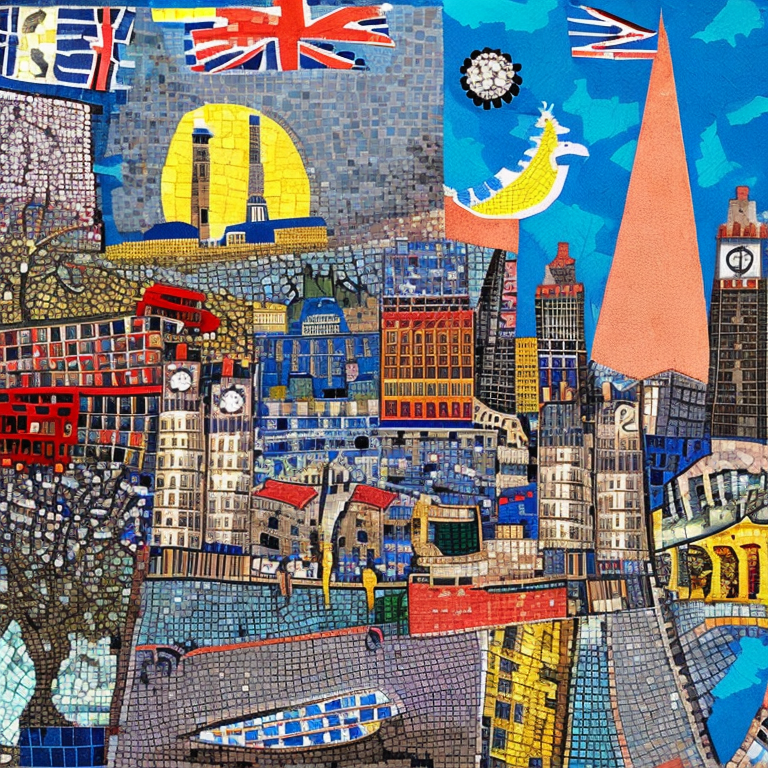

In [11]:
# Image Generation

pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
pipe.to('cuda')

text = "A mosaic depicting london, in surreal style of Salvador Dali."
image = pipe(prompt=text).images[0]
image